# Question 2.3

Generate a plot of this log-likelihood-ratio function for the case $a1 = 0,b1 = 1 $ and $ a2 =1,b2 = 2$ using a suitable programming language

$a1 = 0,b1 = 1$ and $a2 =1,b2 = 2$

 $l(x)   =\frac{|x-1|}{2} - |x|$
 
 x values are taken in the interval [-10,10]

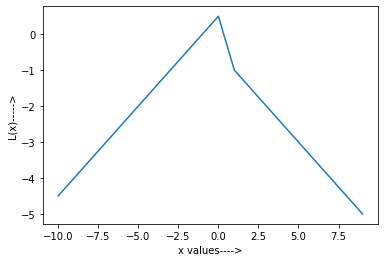

In [15]:
import matplotlib.pyplot as plt

l=[]
x=[i for i in range(-10,10)]

for i in range(-10,10):
    l.append((abs(i-1)/2)-abs(i))
plt.plot(x,l)
plt.xlabel('x values---->')
plt.ylabel('L(x)----->')
plt.show()

    

# Question 4.2

For the case $\mu=1$ and $\sigma^{2}=2$ generate plots that visualize the class-conditional pdfs p(x|L =l) for l ∈ 1,2, as well as class posterior probabilities p(L = l|x) for l ∈ 1,2. Demonstrate the decision boundary you found earlier in these visualizations.

### Class Conditional PDF's

\begin{align}
     P(x/L_{1}) & =\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}} \\
     P(x/L_{2}) & =\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^{2}}{2 \sigma^{2}}} 
\end{align}
 
 

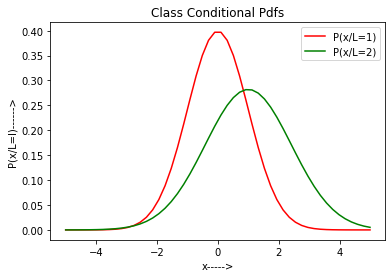

In [179]:
import numpy as np
import math
from scipy.stats import norm


x_axis=np.linspace(-5.0,5.0)
plt.plot(x_axis, norm.pdf(x_axis,0,1),'r',label='P(x/L=1)')
plt.plot(x_axis,norm.pdf(x_axis,1,math.sqrt(2)),'g',label='P(x/L=2)')
plt.title('Class Conditional Pdfs')
plt.xlabel('x----->')
plt.ylabel('P(x/L=l)------>')
plt.legend()
plt.show()



### Class Posterior PDF's

\begin{align}
     P(L_{1}/x) & =\frac{1}{2}\left(\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}\right)  \\
     P(L_{2}/x) & =\frac{1}{2}\left(\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^{2}}{2 \sigma^{2}}}\right)  
      \end{align}

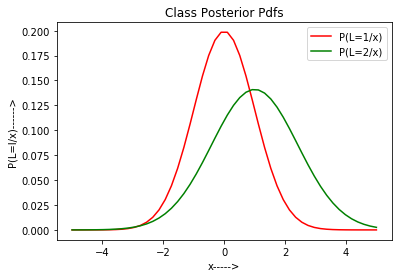

In [41]:
plt.plot(x_axis,norm.pdf(x_axis,0,1)/2,'r',label='P(L=1/x)')
plt.plot(x_axis,norm.pdf(x_axis,1,math.sqrt(2))/2,'g',label='P(L=2/x)')
plt.title('Class Posterior Pdfs')
plt.xlabel('x----->')
plt.ylabel('P(L=l/x)------>')
plt.legend()
plt.show()


The Decision rule is 

$d(x)=\frac{x^{2}}{2}\left[1-\frac{1}{\sigma^{2}}
\right] + \frac{\mu x}{\sigma^{2}} -\frac{\mu^{2}}{2\sigma^{2}}+ \ln{\frac{1}{\sigma}}   \gtrless_{\texttt{D=1}}^{\texttt{D=2}} 0$ 

If $d(x) > 0 \implies x \in$ class 2 otherwise $x \in$ class 1

Visualising The Decision Rule:-

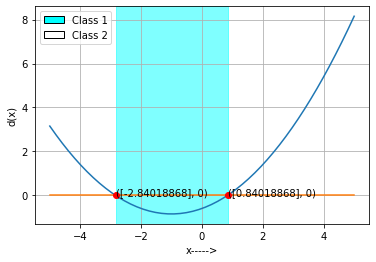

In [182]:
from scipy import optimize
import matplotlib.axes as Axes
from matplotlib.patches import Patch

# X values
x_axis=np.linspace(-5.0,5.0)

#Decission Rule Function 
def f(x):
    return (np.log(norm.pdf(x,1,math.sqrt(2)))-np.log(norm.pdf(x,0,1)))
def g(x):
    return 0

y=[0 for x in range(len(x_axis))]

plt.plot(x_axis,f(x_axis))
plt.plot(x_axis,y)

#Using fsolve to find the roots of the quadratic equation
root1=optimize.fsolve(f,-2)
root2=optimize.fsolve(f,0)

A=root1,root2
B=0,0
legend_elements = [Patch(facecolor='cyan',edgecolor='black', label='Class 1'),Patch(facecolor='white', edgecolor='black',
                         label='Class 2')]
plt.plot(root1,0,'ro')
plt.plot(root2,0,'ro')

#Plotting the decision Region
for xy in zip(A, B):                                       
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.axvspan(root1, root2, alpha=0.5, color='cyan',label=' Class 1')
plt.legend(handles=legend_elements)
plt.ylabel('d(x)')
plt.xlabel('x----->')
plt.grid()
plt.show()


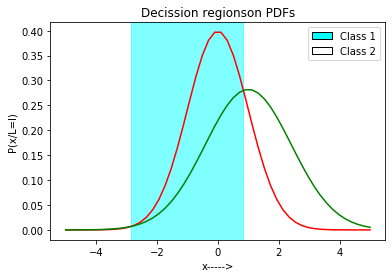

In [183]:
# Plotting the decision Region on the class PDF's
plt.plot(x_axis, norm.pdf(x_axis,0,1),'r')
plt.plot(x_axis,norm.pdf(x_axis,1,math.sqrt(2)),'g')
plt.axvspan(root1, root2, alpha=0.5, color='cyan')
plt.legend(handles=legend_elements)
plt.ylabel('P(x/L=l)')
plt.xlabel('x----->')
plt.title('Decission regionson PDFs')
plt.show()


# Question 5

Implement Code: Write code that takes in N, n, µ, and Σ and produces N samples of independent and identically distributed (iid) n-dimensional random vectors {x1,...,xN} drawn from N (µ,Σ) using the linear transformation technique applied to samples of z ∼ N (0,I).

Here the cov matrix is decomposed using cholsesky decomposition Technique. In cholskey decomposition covariance matrix is split into a matrix A and its Transpose

\begin{equation*}
    \Sigma = U\wedge U^{T}=U\wedge^{1/2}(\wedge^{1/2})^{T})U^{T}=U\wedge^{1/2}(U\wedge^{1/2})^{T}
\end{equation*}

if $A = U\wedge^{1/2}$ then $\Sigma = AA^{T} $

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mean and covariance of 3 dimensional  Gaussian function
N=int(input())
mu=[0.3,0.4,0.5]
cov = np.array([[ 1.0, -0.14,  0.89], 
                [-0.14, 1.0,  0.16],
                [ 0.89,  0.16,  1.0]])

# cholesky deccomposition of covariance matrix
L = np.linalg.cholesky(cov)
X_iid=np.random.normal(0,1,(3,N))

# x=Az +b
x_n=np.dot(L,X_iid)

for i in range(0,N):
    x_n[:,i]=x_n[:,i]+mu

y=[np.mean(x_n[0,:]),np.mean(x_n[1,:]),np.mean(x_n[2,:])]
print("mean after linear transformation")
print(set(y))


147
mean after linear transformation
{0.3654602253860161, 0.5411020431305923, 0.4205306192329456}
